## Decision Tree
+ if-then-else 결정규칙을 통해 값을 예측
+ 연속형, 범주형 데이터 모두 사용 가능
+ 회귀, 분류에 모두 사용 가능

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import multiprocessing

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text, plot_tree, export_graphviz
import graphviz
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 회귀 문제
### 1. 보스턴 집값 데이터셋

In [80]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target

print(boston_df.shape)
boston_df.head()

(506, 14)


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [81]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = DecisionTreeRegressor()
train_score = cross_val_score(estimator=model,
                X=X_train, y=y_train,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
test_score = cross_val_score(estimator=model,
                X=X_test, y=y_test,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
print('---------- 전처리 전 ----------')
print(f'학습데이터 평균점수 : {train_score.mean()}')
print(f'평가데이터 평균점수 : {test_score.mean()}')

model = make_pipeline(StandardScaler(),
                      DecisionTreeRegressor())
train_score = cross_val_score(estimator=model,
                X=X_train, y=y_train,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
test_score = cross_val_score(estimator=model,
                X=X_test, y=y_test,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
print('---------- 전처리 후 ----------')
print(f'학습데이터 평균점수 : {train_score.mean()}')
print(f'평가데이터 평균점수 : {test_score.mean()}')
#결정트리는 규칙을 학습하기 때문에, 전처리에 크게 영향을 받지 않는 것을 볼 수 있음

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

---------- 전처리 전 ----------
학습데이터 평균점수 : 0.7355814645849794
평가데이터 평균점수 : 0.5341636847625929
---------- 전처리 후 ----------
학습데이터 평균점수 : 0.6978511732422397
평가데이터 평균점수 : 0.5436714494842346


In [82]:
#시각화(export_text 사용)
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

r = export_text(decision_tree=model)

print(r)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 75.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  75.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- featur

[Text(379.06912783614354, 371.007, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(236.73199121138938, 351.981, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(106.1064511872397, 332.955, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(61.05243159995372, 313.929, 'X[0] <= 10.592\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(60.01957644030541, 294.90299999999996, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(62.08528675960203, 294.90299999999996, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(151.16047077452566, 313.929, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(64.15099707889865, 294.90299999999996, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(23.739530310041644, 275.87699999999995, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(22.706675150393334, 256.851, 'square

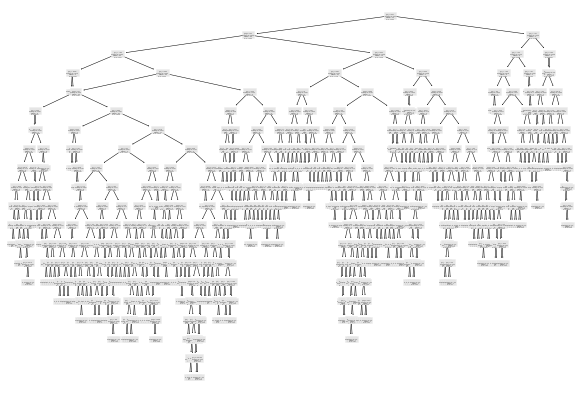

In [83]:
#시각화(plot_tree 사용)
fig = plt.figure(figsize=(10,7))
plot_tree(model)

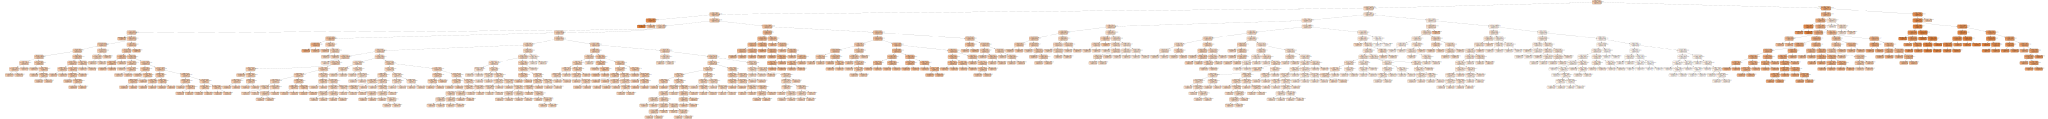

In [84]:
#시각화(graphviz 사용)
dot_data = export_graphviz(decision_tree=model,
                           feature_names=boston.feature_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

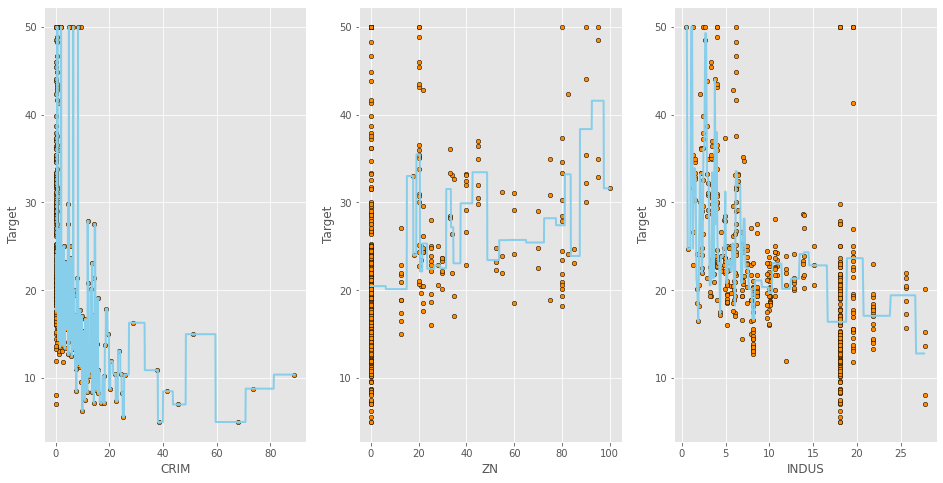

In [85]:
#회귀식 시각화
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target
    
    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    y_pred = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target');

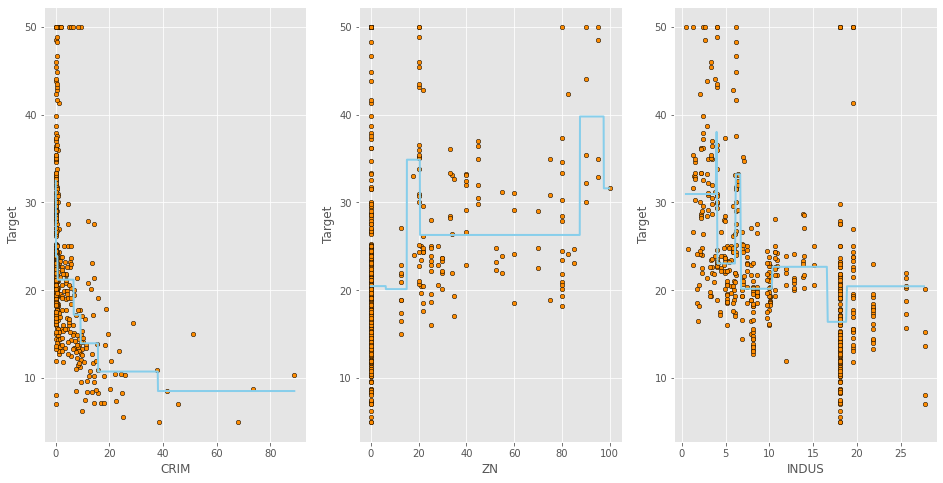

In [86]:
#모델에 하이퍼파라미터 튜닝 후 회귀식 시각화
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target
    
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    y_pred = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target');

### 2. 당뇨병 데이터셋

In [87]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print(diabetes_df.shape)
diabetes_df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [88]:
#전처리 없이 학습
model = DecisionTreeRegressor()

cross_val_score(estimator=model,
                X=diabetes.data, y=diabetes.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())

array([-0.28229217, -0.54703749,  0.01218497, -0.09439714, -0.34334747,
        0.27038426,  0.02886527, -0.77655367, -0.23508673,  0.0218574 ])

In [89]:
#전처리 후 학습
model = make_pipeline(StandardScaler(),
                      DecisionTreeRegressor())

cross_val_score(estimator=model,
                X=diabetes.data, y=diabetes.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
#결정트리는 규칙을 학습하기 때문에, 전처리에 큰 영향을 받지 않는 것을 확인할 수 있음

array([-0.54459275, -0.99936336,  0.04433046,  0.1575157 , -0.42338091,
        0.02181766,  0.1157319 , -0.55873754, -0.19712537,  0.09238097])

In [90]:
#시각화(export_text 사용)
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

r = export_text(decision_tree=model)

print(r)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- feature_4 <= 0.06
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- feature_3 <= -0.03
|   |   |   |   |   |   |--- feature_0 <= -0.05
|   |   |   |   |   |   |   |--- feature_3 <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- feature_3 >  -0.09
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.05
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.07
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_3 >  -0.05
|   |   |   |   |   |

[Text(298.2233615165393, 371.46, 'X[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(172.88242537559304, 353.34, 'X[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(116.27374637585662, 335.21999999999997, 'X[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(65.46646020031629, 317.1, 'X[4] <= 0.063\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(50.483263046916186, 298.98, 'X[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(24.046652609383237, 280.86, 'X[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(13.23668950975224, 262.74, 'X[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(4.706378492356352, 244.62, 'X[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(3.529783869267264, 226.5, 'squared_error = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(5.88297311544544, 226.5, 'X[3] <=

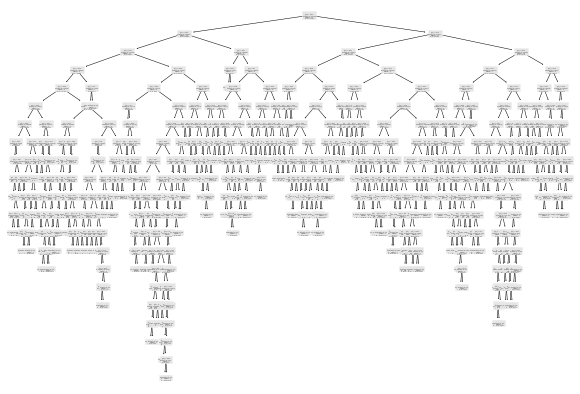

In [91]:
#시각화(plot_tree 사용)
fig = plt.figure(figsize=(10,7))
plot_tree(model)

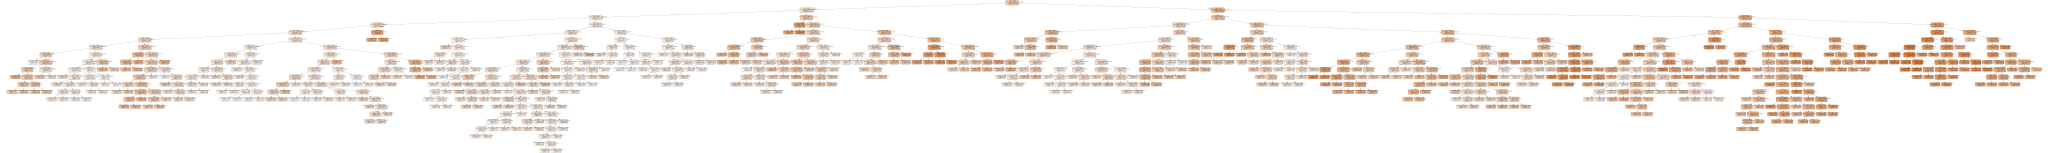

In [92]:
#시각화(graphviz 사용)
dot_data = export_graphviz(decision_tree=model,
                           feature_names=diabetes.feature_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

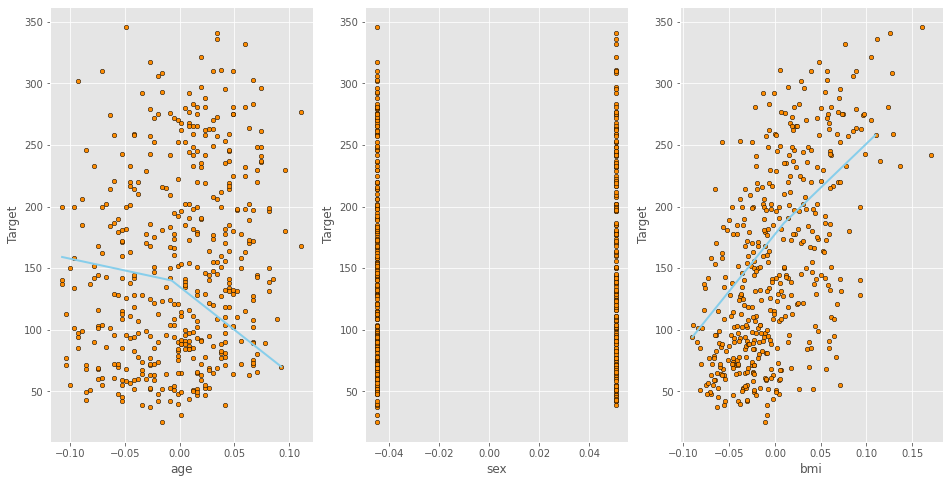

In [93]:
#회귀식 시각화
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target
    
    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    y_pred = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target');

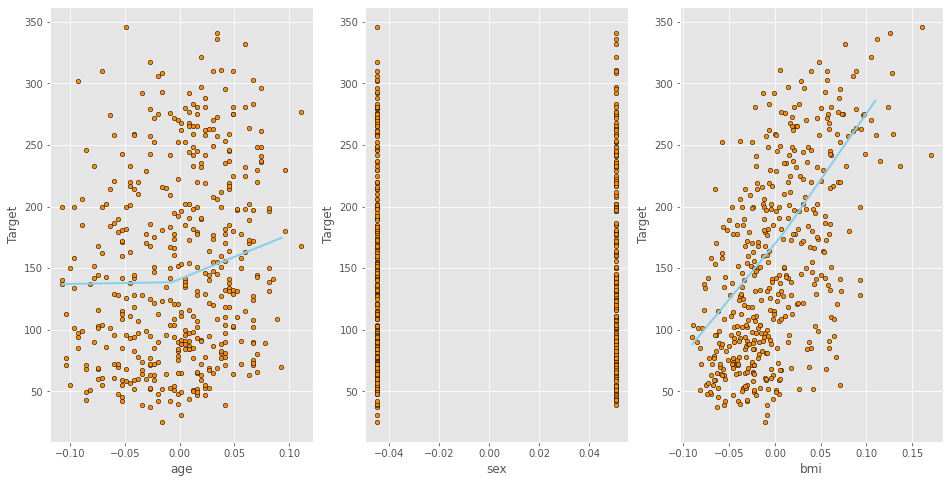

In [94]:
#모델에 하이퍼파라미터 튜닝 후 회귀식 시각화
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target
    
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    y_pred = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target');

## 분류 문제
### 1. 붓꽃 데이터셋

In [95]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [96]:
#전처리 없이 학습
model = DecisionTreeClassifier()

cross_val_score(estimator=model,
                X=iris.data, y=iris.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [97]:
#전처리 후 학습
model = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())

cross_val_score(estimator=model,
                X=iris.data, y=iris.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
#결정트리는 규칙을 학습하기 때문에, 전처리에 큰 영향을 받지 않는 것을 확인할 수 있음

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [98]:
#시각화(export_text 사용)
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

r = export_text(decision_tree=model,
                feature_names=iris.feature_names)

print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(279.0, 348.81, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 285.39, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(321.9230769230769, 285.39, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(171.69230769230768, 221.97, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(85.84615384615384, 158.55, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(42.92307692307692, 95.13, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 158.55, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(214.61538461538458, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.46153846153845, 95.13, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(257.53846153846155, 31.710000000000036, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(3

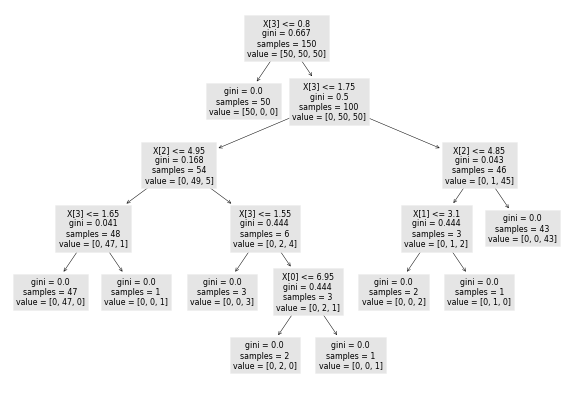

In [99]:
#시각화(plot_tree 사용)
fig = plt.figure(figsize=(10,7))
plot_tree(model)

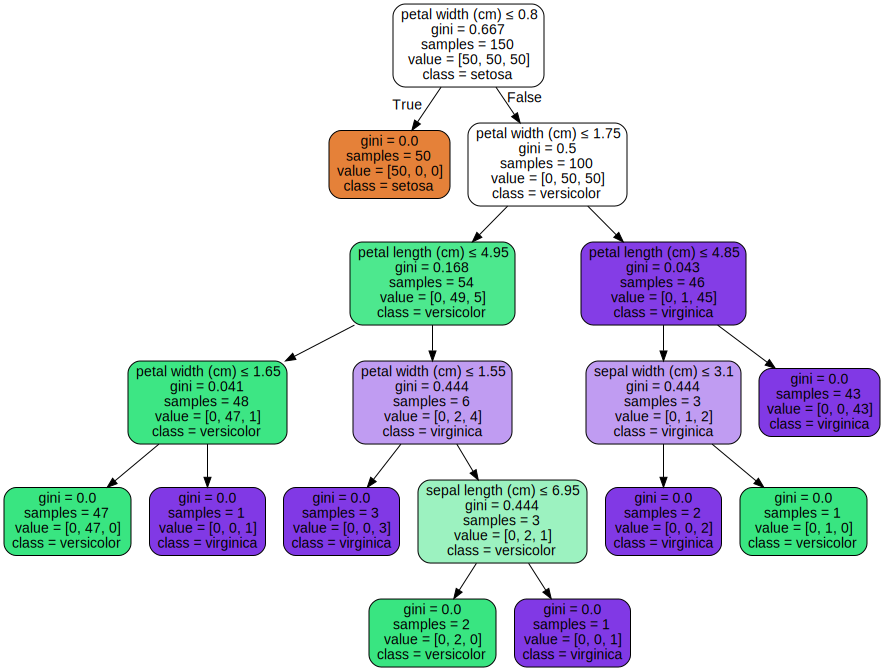

In [100]:
#시각화(graphviz 사용)
dot_data = export_graphviz(decision_tree=model,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

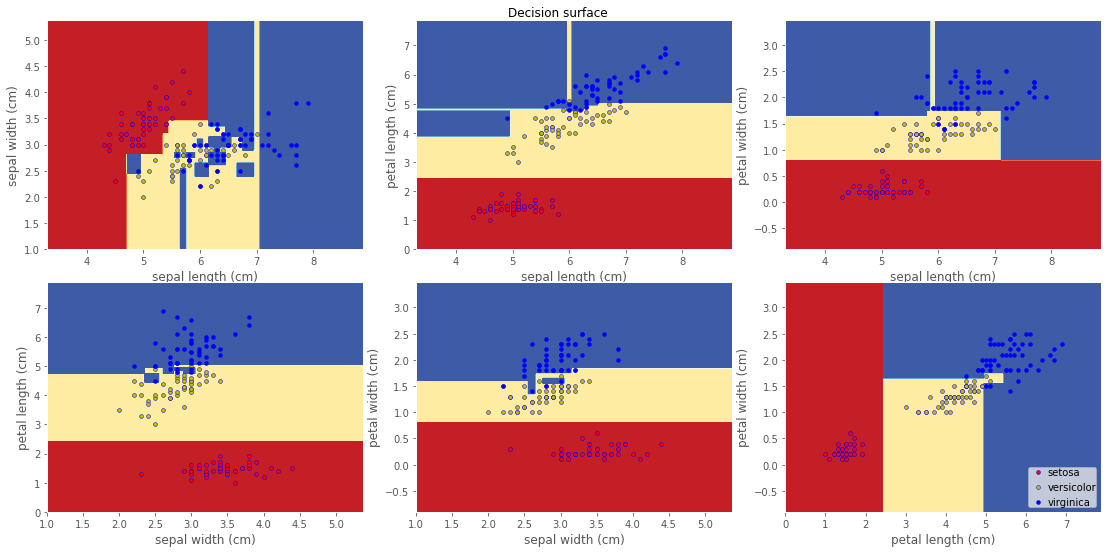

In [101]:
#결정경계 시각화
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');

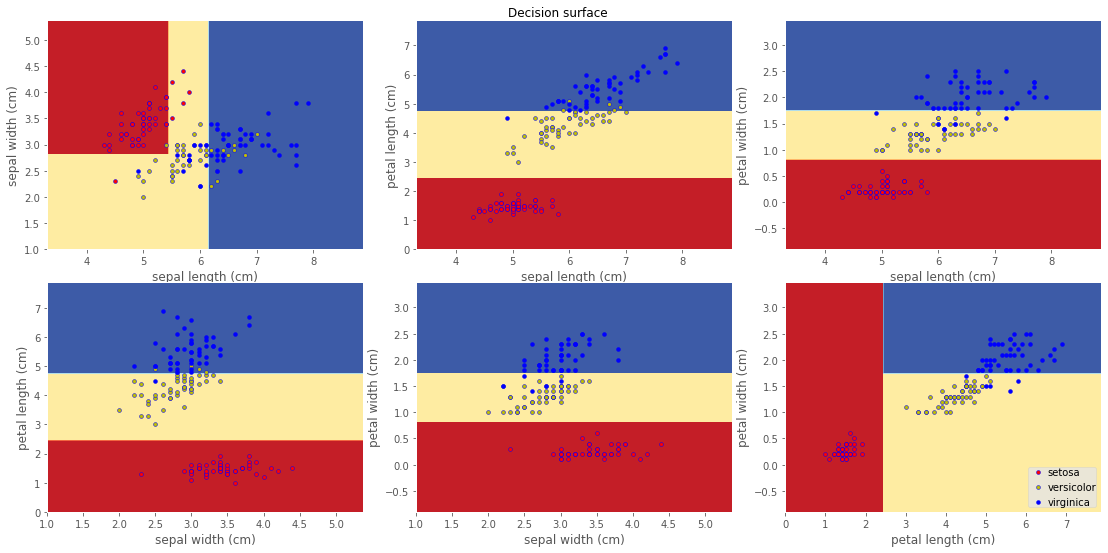

In [102]:
#모델의 하이퍼파라미터 변경해보면서 결정경계 변화 확인
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');
#max_depth=2로 제한했더니 결정경계가 단순해진 것을 볼 수 있음(overfitting 방지해 일반화에 도움)

### 2. 와인 데이터셋

In [103]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

print(wine_df.shape)
wine_df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [104]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = DecisionTreeClassifier()
train_score = cross_val_score(estimator=model,
                X=X_train, y=y_train,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
test_score = cross_val_score(estimator=model,
                X=X_test, y=y_test,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
print('---------- 전처리 전 ----------')
print(f'학습데이터 평균점수 : {train_score.mean()}')
print(f'평가데이터 평균점수 : {test_score.mean()}')

model = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())
train_score = cross_val_score(estimator=model,
                X=X_train, y=y_train,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
test_score = cross_val_score(estimator=model,
                X=X_test, y=y_test,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
print('---------- 전처리 후 ----------')
print(f'학습데이터 평균점수 : {train_score.mean()}')
print(f'평가데이터 평균점수 : {test_score.mean()}')

---------- 전처리 전 ----------
학습데이터 평균점수 : 0.9161904761904763
평가데이터 평균점수 : 0.95
---------- 전처리 후 ----------
학습데이터 평균점수 : 0.9152380952380954
평가데이터 평균점수 : 0.95


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [105]:
#시각화(export_text 사용)
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

r = export_text(decision_tree=model,
                feature_names=wine.feature_names)

print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.43
|  

[Text(315.7105263157895, 348.81, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(190.89473684210526, 285.39, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(117.47368421052632, 221.97, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(58.73684210526316, 158.55, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(29.36842105263158, 95.13, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(88.10526315789474, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(176.21052631578948, 158.55, 'X[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(146.8421052631579, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(205.57894736842104, 95.13, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(264.3157894736842, 221.97, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(234.94736842105263, 158.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')

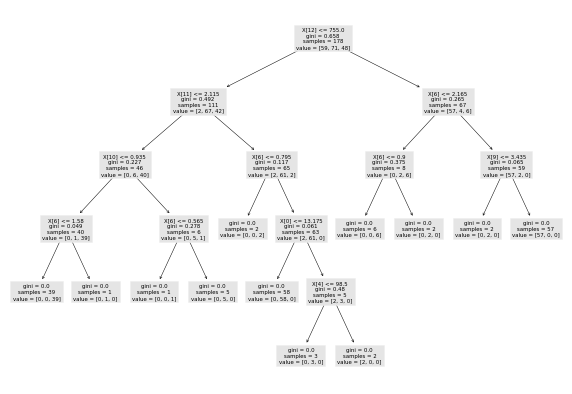

In [106]:
#시각화(plot_tree 사용)
fig = plt.figure(figsize=(10,7))
plot_tree(model)

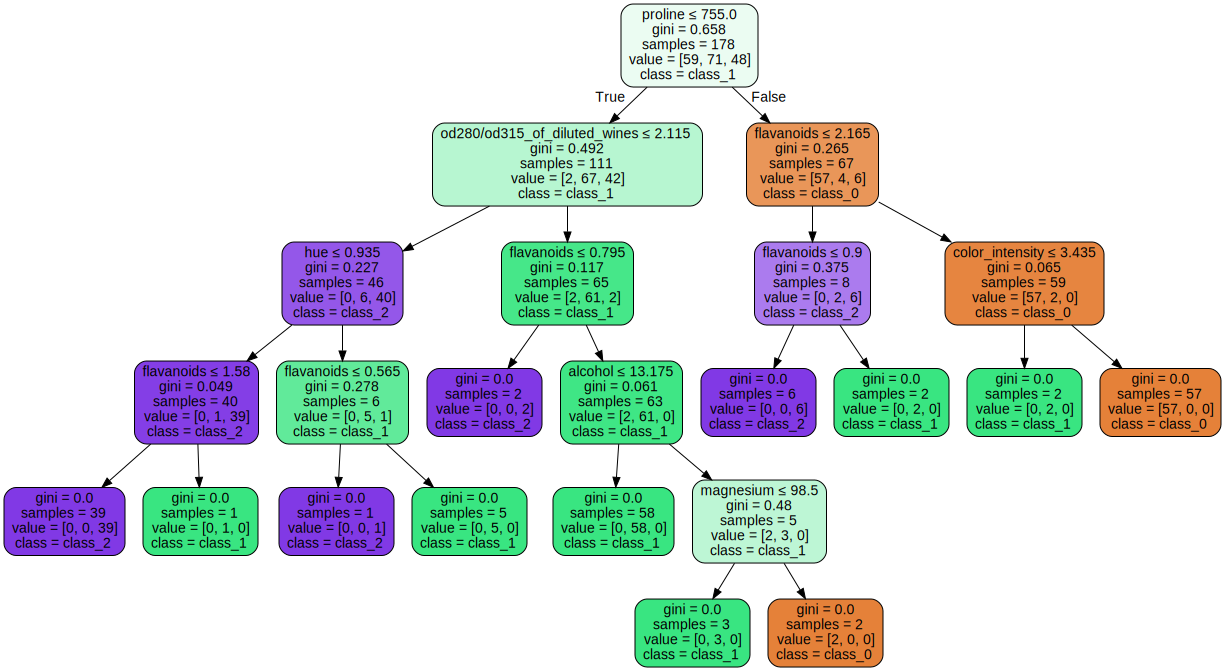

In [107]:
#시각화(graphviz 사용)
dot_data = export_graphviz(decision_tree=model,
                           feature_names=wine.feature_names,
                           class_names=wine.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

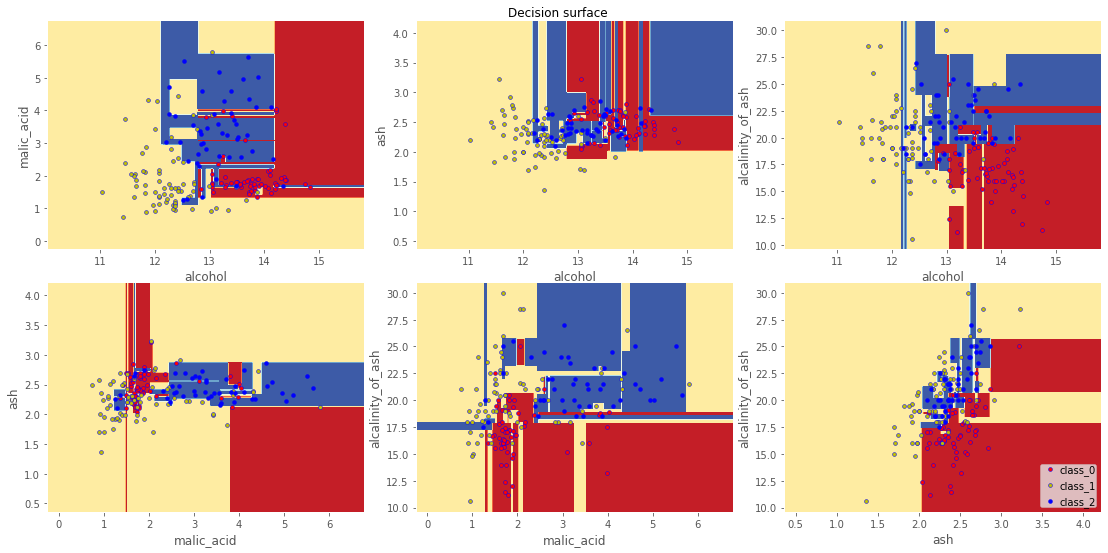

In [108]:
#결정경계 시각화
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier()
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');

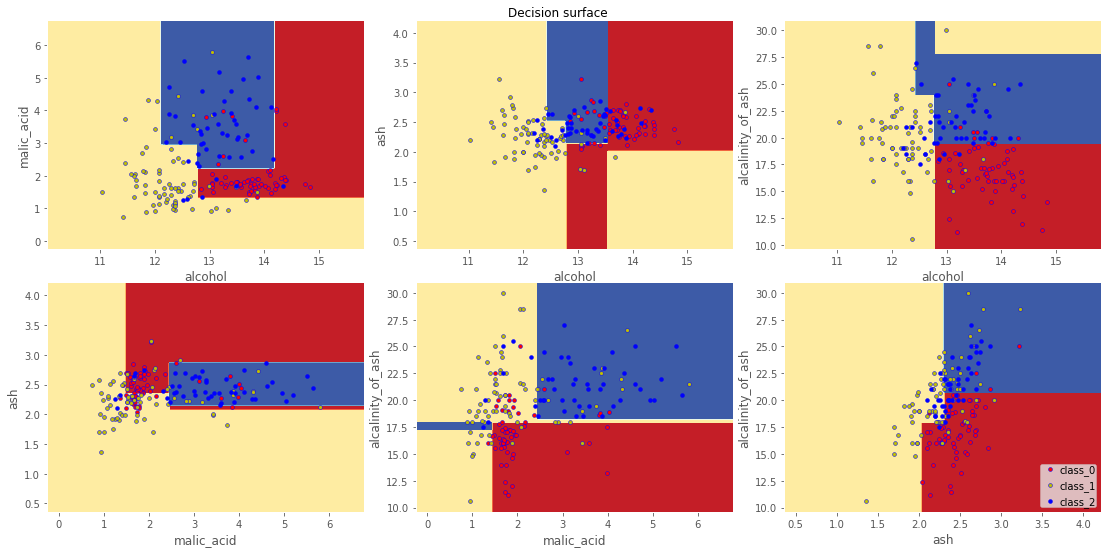

In [109]:
#모델의 하이퍼파라미터 변경해보면서 결정경계 변화 확인
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');
#max_depth=3으로 제한했더니 결정경계가 단순해진 것을 볼 수 있음(overfitting 방지해 일반화에 도움)

### 3. 유방암 데이터셋

In [110]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

print(cancer_df.shape)
cancer_df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [111]:
#전처리 없이 학습
model = DecisionTreeClassifier()

cross_val_score(estimator=model,
                X=cancer.data, y=cancer.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())

array([0.9122807 , 0.87719298, 0.92982456, 0.89473684, 0.92982456,
       0.89473684, 0.87719298, 0.94736842, 0.92982456, 0.94642857])

In [112]:
#전처리 후 학습
model = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())

cross_val_score(estimator=model,
                X=cancer.data, y=cancer.target,
                cv=10,
                n_jobs=multiprocessing.cpu_count())
#결정트리는 규칙을 학습하기 때문에, 전처리에 큰 영향을 받지 않는 것을 확인할 수 있음(오히려 점수가 낮아짐)

array([0.92982456, 0.87719298, 0.92982456, 0.89473684, 0.9122807 ,
       0.9122807 , 0.9122807 , 0.94736842, 0.92982456, 0.96428571])

In [113]:
#시각화(export_text 사용)
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

r = export_text(decision_tree=model)

print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_18 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_18 >  0.01
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_1 <= 19.90
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  19.90
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |--- feature_28 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_

[Text(340.03125, 356.73749999999995, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(209.25, 309.1725, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(95.90625, 261.60749999999996, 'X[18] <= 0.009\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(78.46875, 214.0425, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(113.34375, 214.0425, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(69.75, 166.4775, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(34.875, 118.91250000000002, 'X[1] <= 19.9\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(17.4375, 71.34749999999997, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(52.3125, 71.34749999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(104.625, 118.91250000000002, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(87.1875, 71.34749999999997, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(122.0625, 

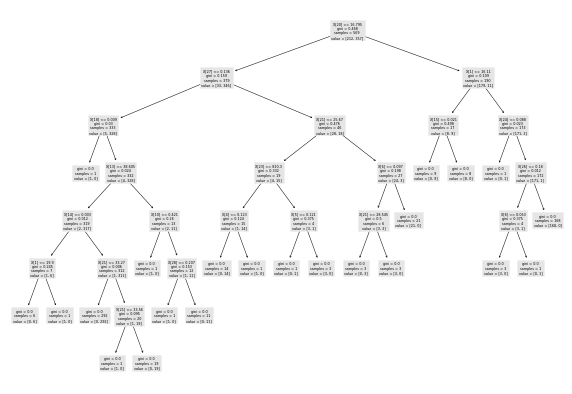

In [114]:
#시각화(plot_tree 사용)
fig = plt.figure(figsize=(10,7))
plot_tree(model)

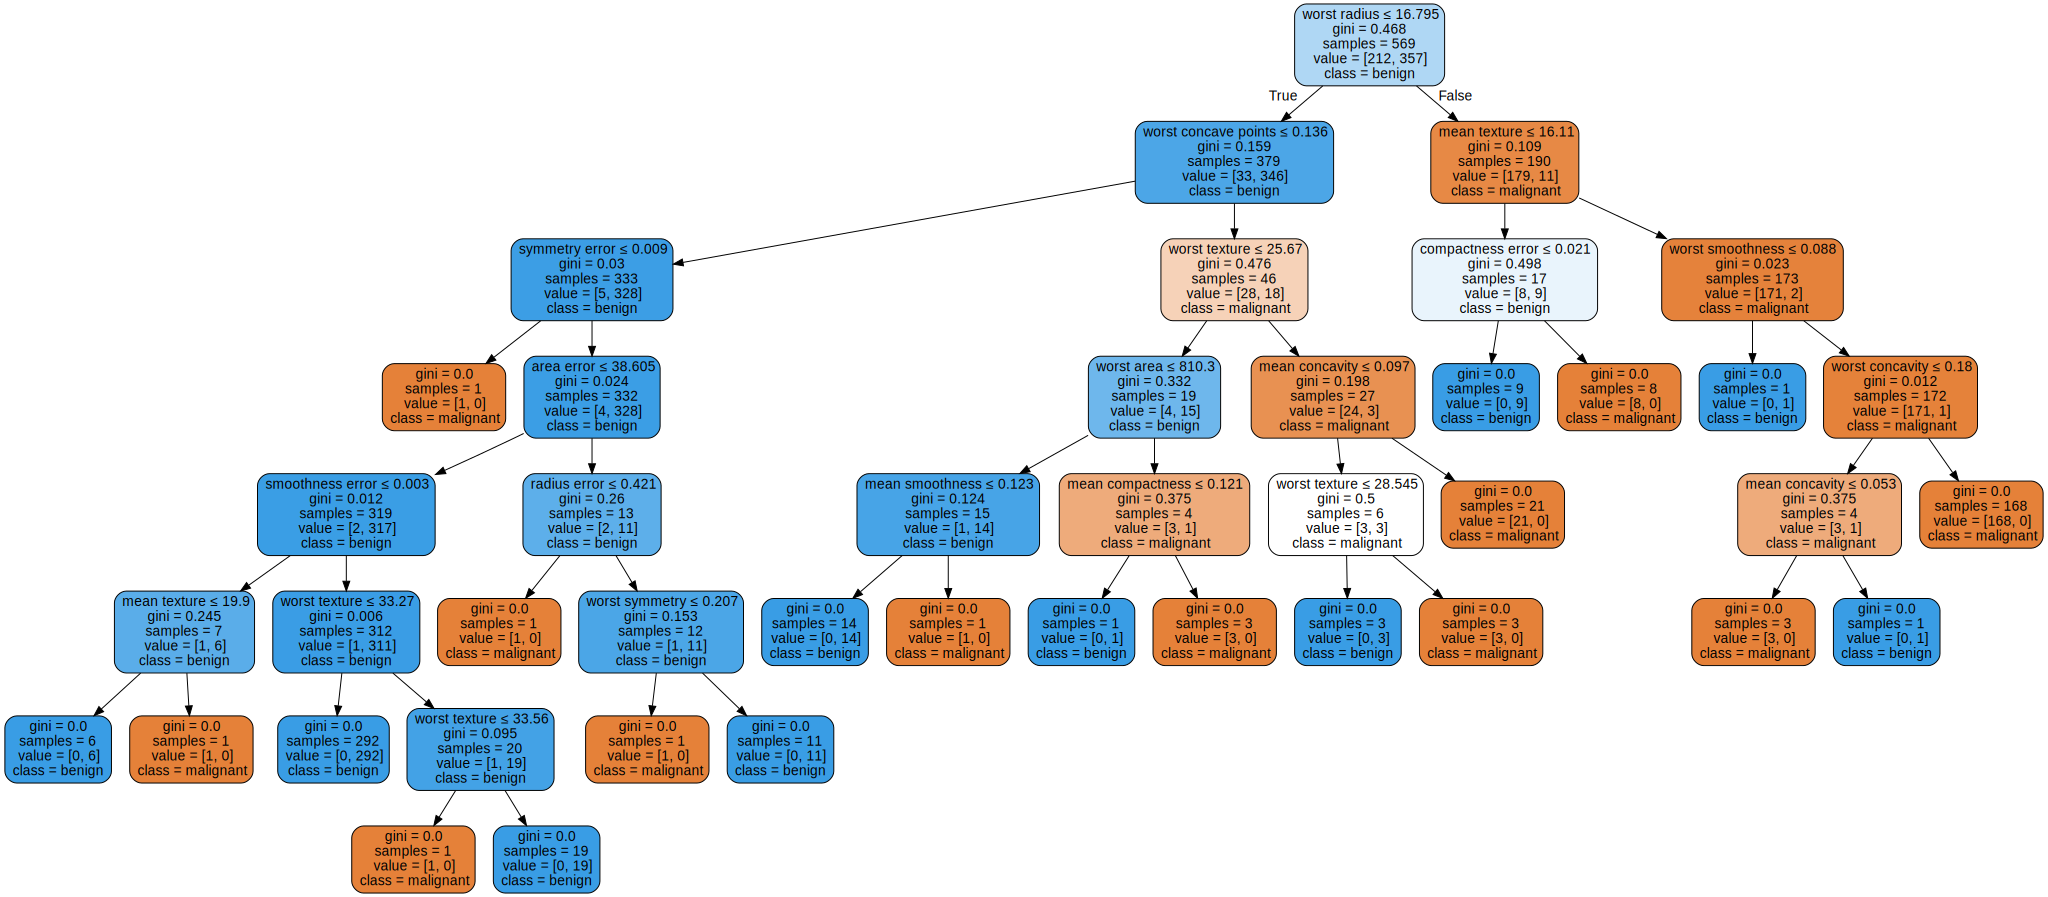

In [115]:
#시각화(graphviz 사용)
dot_data = export_graphviz(decision_tree=model,
                           feature_names=cancer.feature_names,
                           class_names=cancer.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

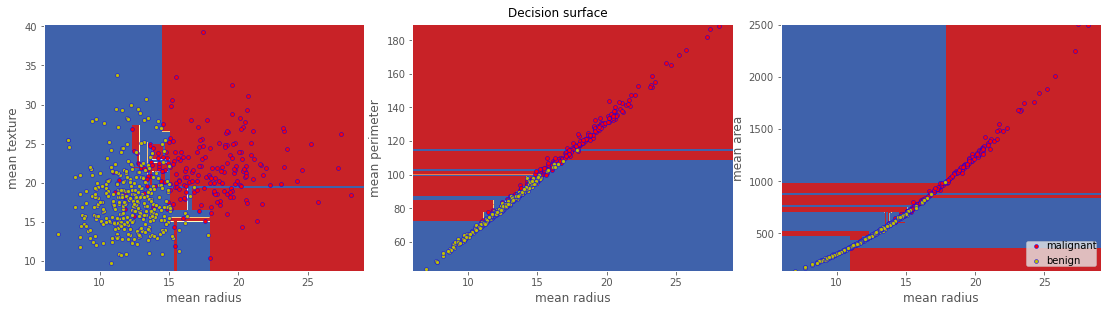

In [116]:
#결정경계 시각화
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2],[0,3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier()
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');

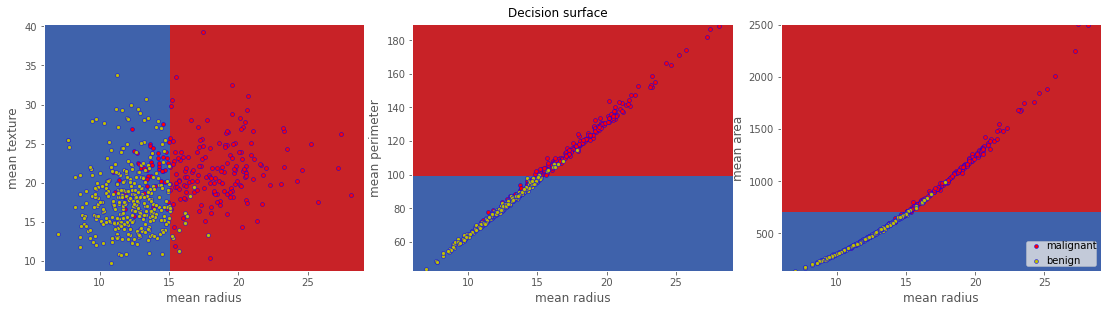

In [117]:
#모델의 하이퍼파라미터 변경해보면서 결정경계 변화 확인
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1], [0,2],[0,3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X, y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');
#max_depth=2로 제한했더니 결정경계가 단순해진 것을 볼 수 있음(overfitting 방지해 일반화에 도움)